##Projeto 1 de Modelagem Computacional
Grupo:
1. Mateus Vespasiano de Castro - RA: 159.505
2. Marcos Vinicius Gasparoto Bauab - RA: 156.717
3. Luiz Fernando de Cristo Moloni - RA: 159.325

###Objetivos
A partir deste projeto, pretendemos apresentar inicialmente simulações de queda livre, com e sem atrito do ar, e em posse dos conhecimentos adquiridos simular um lançamento oblíquo com todos os seus componentes. Em suma, utilizando-nos da modelagem computacional para modelar situações que de outra forma seriam dificultosas de serem visualizadas.

In [ ]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math

##Corpo Em Queda Livre (sem atrito do ar)

###Variáveis

In [ ]:
g = 10
m = 5
kAt = 1
theta = 0.9
H = 1000

DT = 0.01
t = [DT]
T = 10
DS = 0

v = [0]
DV = 0

S = [H]

i = 1

###Cálculos


In [ ]:
for j in np.arange(DT, T, DT): 

  DV = g*DT
  
  DS = v[i-1] * DT
  
  v.append(v[i - 1] + DV)
  
  S.append(S[i-1] - DS)

  t.append(t[i - 1] + DT)

  i = i + 1

###Gráficos 

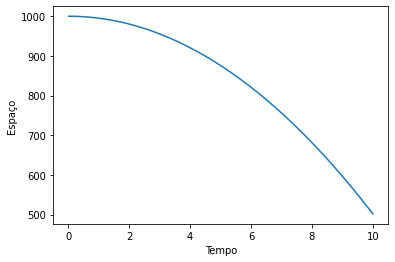

In [ ]:
#Primeiro Gráfico -> Variação do Espaço por Tempo
plt.xlabel('Tempo')
plt.ylabel('Espaço')
plt.plot(t, S)
plt.show()

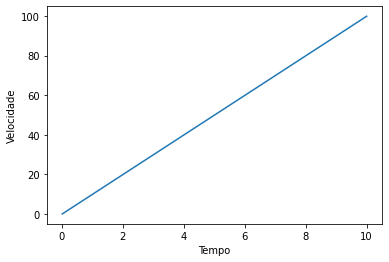

In [ ]:
#Segundo Gráfico -> Variação da Velocidade pelo Tempo
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.plot(t, v)
plt.show()

###Conclusão das Análises
Analisando o gráficos que relacionam o espaço com o tempo, e a velociade com o tempo, percebemos que por conta da aceleração da gravidade, a velocidade que o corpo assume é aumentada a cada instante, e como nesta simulação o corpo tem velocidade inicial igual a zero, porque esse parte do repouso, esta assume valores positivos durante a queda, assim temos como consequência um decremento na altura onde o corpo se encontra de acordo com o tempo.

##Corpo Em Queda Livre (com atrito do ar)

###Variáveis

In [ ]:
g = 10
m = 3
kAt = 1
theta = 0.9
H = 1000

DT = 0.01
t = [DT]
T = 10
DS = 0

v = [0]
DV = 0

S = [H]

i = 1

###Cálculos

In [ ]:
for j in np.arange(DT, T, DT):

  if(S[i - 1] >= 0):
    DV = g*DT - ((kAt*v[i - 1])/m) * DT
    
    DS = v[i-1] * DT
    
    v.append(v[i - 1] + DV)
    
    S.append(S[i-1] - DS)

    t.append(t[i - 1] + DT)

    i = i + 1

###Gráficos

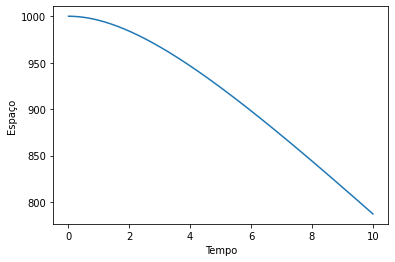

In [ ]:
#Primeiro Gráfico -> Variação do Espaço por Tempo
plt.xlabel('Tempo')
plt.ylabel('Espaço')
plt.plot(t, S)
plt.show()

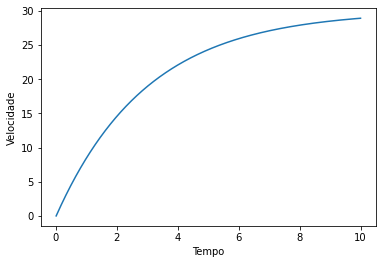

In [ ]:
#Segundo Gráfico -> Variação da Velocidade pelo Tempo
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.plot(t, v)
plt.show()

###Conclusão das Análises
Analisando os gráficos que relacionam o espaço com o tempo, e a velociade com o tempo, percebemos que por conta da aceleração da gravidade, a velocidade que o corpo assume é aumentada, mas diferente do caso anterior ela sofre uma perda por causa do atrito. Porém ao chegar próximo à velocidade limite de aproximadamente 29m/s, a velocidade tende a estagnar, isso acontece quando a componente vertical da velocidade se iguala a componente vertical do atrito com o ar.

#Lançamento Oblíquo

###Variáveis

In [ ]:
g = -10   # !!! Força da Gravidade (Negativa por a partícula está caindo) 
m = 5     # !!! Massa do corpo 
kAt = 5   # !!! Coeficiente de Atrito (também chamado de Arrasto Aerodinâmico)
pi = math.pi
theta = pi / 6  # !!! Ângulo de Lançamento da Partícula
DT = 0.001  # Variação do tempo
t = [0]
T = 10  # !!! Tempo total da Simulação

# ===================== Componentes da Velocidade ==============================
# VetResultV é o vetor resultante das componentes vetX e vetY

vetResultV = [10]  # !!! Velocidade inicial da particula ====> ex: 10 m/s

vetX = [vetResultV[0]*math.cos(theta)]   # Valor inicial do Vetor
vetY = [vetResultV[0]*math.sin(theta)]

# ===================== Componentes da Posição ================================
# VetResultS é o vetor resultante das componentes vetSy e vetSy

vetSx = [0]
vetSy = [0]
vetResultS = []

# ===================== Altura de Lançamento do Corpo =========================
Sy = vetSy[0] # !!!

# ========================== Ernegias =========================================
Ec = [(((vetResultV[0])**2) * m) /2]
Ep = [abs((m * g * vetSy[0]))]
Em = [Ec[0] + Ep[0]]


###Cálculo

In [ ]:
def vetResultante(vetX, vetY):
  """ 
  Dadas as componentes X e Y de um vetor, essa função calcula o vetor 
  resultante deste, que seria a hipotenusa do triângulo retângulo    
  """
  return math.sqrt((vetX)**2 + (vetY)**2)

def energiaCinetica(vetResultV, massa):
  return (((vetResultV)**2) * massa) /2

def energiaPotencial(massa, gravidade, altura):
  return abs((massa * gravidade * altura))

def energiaMecanica(Ec, Ep):
  return Ec + Ep

def componentesDeS(vetS, vet, DT):
  return vetS + vet * DT

def componenteDeVx(vetVx, k, massa, DT):
  return vetVx + ((-k * vetVx)/massa) * DT

def componenteDeVy(vetVy, g,  k, massa, DT):
  return vetVy + (g - (k/massa) * vetVy) * DT

i = 1

# Iterador responsável pelo decorrer do tempo, inicia em DT e vai até T em 
# passo DT
for j in np.arange(DT, T, DT):
  vX = componenteDeVx(vetX[i - 1], kAt, m, DT)
  vetX.append(vX)

  if (Sy >= 0):
    vY = componenteDeVy(vetY[i - 1], g, kAt, m, DT)
    
    vetY.append(vY)
  else:
    vY = -1 * (componenteDeVy(vetY[i - 1], g, kAt, m, DT))
    vetY.append(vY)

  Sx = componentesDeS(vetSx[i - 1], vetX[i], DT)
  vetSx.append(Sx)

  Sy = componentesDeS(vetSy[i - 1], vetY[i], DT) 
  vetSy.append(Sy)

  vetV = vetResultante(vetX[i], vetY[i])
  vetResultV.append(vetV)

  vetS = vetResultante(vetSx[i], vetSy[i])
  vetResultS.append(vetS)

  Ec.append(energiaCinetica(vetResultV[i], m))

  Ep.append(energiaPotencial(m, g, vetSy[i]))

  Em.append(energiaMecanica(Ec[i], Ep[i]))

  t.append(t[i - 1] + DT)

  i = i + 1


##Gráficos

###Análise do Gráfico da Velocidade
Analisando os gráficos que relacionam as velociades no eixco x e eixo y com o tempo, percebemos que a velocidade assumida pelo corpo é reduzida a cada instante. A causa desses decrementos em ambas as variáveis (velocidade no eixo x e no eixo y) é a força de atrito que age em ambos os eixos, além disso, há a ação da gravidade em apenas um dos eixos (Y).

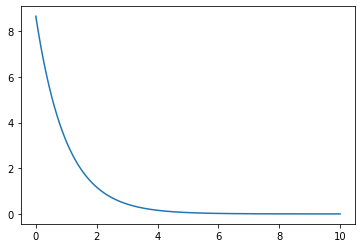

In [ ]:
#Gráfico -> Variação da Velocidade no eixo X pelo Tempo
plt.plot(t, vetX) 
plt.show()

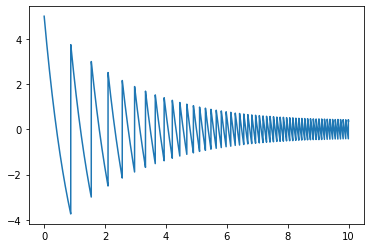

In [ ]:
#Gráfico -> Variação da Velocidade no eixo Y pelo Tempo
plt.plot(t, vetY)
plt.show()

###Análise do Gráfico do Espaço
Analisando os gráficos que relacionam os espaços (vetSx e vetSy) com o tempo, em vetSy percebemos que o espaço no eixo y (altura) tende a diminuir ao atingir a altura máxima pois a componente de Vy possui o valor zero neste ponto, e devido a força da gravidade, Vy assumirá valores negativos, fazendo com que o corpo comece a cair, mas ao atingir o solo, a partícula começará um novo ciclo, porém com a componente Vy em menor magnitude. Em vetSx, o corpo partindo de velocidade 10m/s irá sofrer com a componente horizontal do atrito fazendo com que sua velocidade diminua gradualmente, logo o espaço percorrido por segundos será menor.

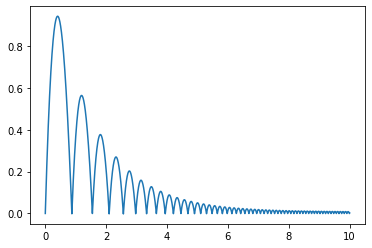

In [ ]:
plt.plot(t, vetSy)
plt.show()

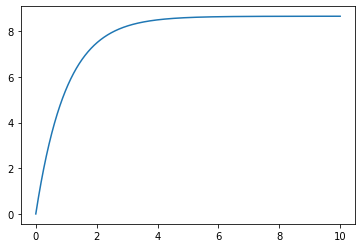

In [ ]:
plt.plot(t, vetSx)
plt.show()

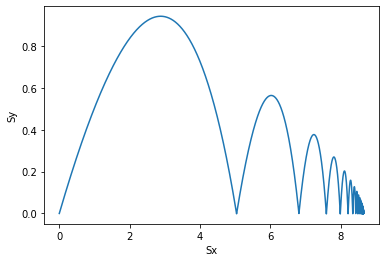

In [ ]:
# Posição em X e Y
plt.plot(vetSx, vetSy)
plt.xlabel("Sx")
plt.ylabel("Sy")
plt.show()

###Análise do Gráfico de Energias
Dado o gráfico, vemos que a Energia Potencial e a Energia Cinética são opostas em seus vales e picos e ambas decrescem com o tempo, devido a ação da gravidade e da força de atrito. Começando em zero, temos a Energia Potencial, que devido a ausência de altura é nula. Em contraponto, vemos a Energia Cinética, começando em seu maior valor e diminuindo à medida que a Energia Potencial aumenta, agindo de maneira coerente ao comportamento da conservação de energias. Por fim, temos a Energia Mecânica que representa a soma de ambas as curvas e portanto, também decresce com o tempo e tende ao valor zero.

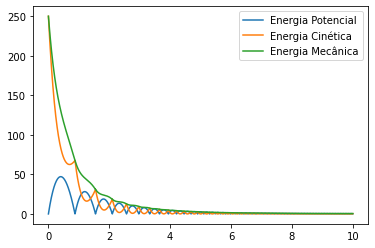

In [ ]:
plt.plot(t, Ep, label="Energia Potencial")
plt.plot(t, Ec, label="Energia Cinética")
plt.plot(t, Em, label="Energia Mecânica")
plt.legend()
plt.show()